# Building Models with `torch.nn`

## The `torch.nn.Module` Base Class

In [1]:
# skeleton of a custom module:

import torch 
import torch.nn as nn

class SimpleNetwork(nn.Module):
    def __init__(self):
        super(SimpleNetwork, self).__init__()
        # define layers or components here
        # example: a linear layer
        self.layer1 = nn.Linear(in_features=10, out_features=5)
        # example: an activation function instance
        self.activation = nn.ReLU()
        
    def forward(self, x):
        # define the flow of data through the components
        x = self.layer1(x)
        x = self.activation(x)
        return x
    
# Instantiate the network
model = SimpleNetwork()
print(model)
    

SimpleNetwork(
  (layer1): Linear(in_features=10, out_features=5, bias=True)
  (activation): ReLU()
)


In [1]:
import torch
import torch.nn as nn

class CustomModuleWithParameter(nn.Module):
    def __init__(self):
        super().__init__()
        # A learnable parameter tensor
        self.my_weight = nn.Parameter(torch.randn(5, 2))
        # A regular tensor attribute (not automatically tracked for optimization)
        self.my_info = torch.tensor([1.0, 2.0])

    def forward(self, x):
        # Example usage
        return torch.matmul(x, self.my_weight)

module = CustomModuleWithParameter()

# Accessing parameters tracked by the module
for name, param in module.named_parameters():
    print(f"Parameter name: {name}, Shape: {param.shape}, Requires grad: {param.requires_grad}")

Parameter name: my_weight, Shape: torch.Size([5, 2]), Requires grad: True


## Defining Custom Network Architectures

In [2]:
# a simple linear regression model implemented as a custom module

import torch 
import torch.nn as nn

class SimpleLinearModel(nn.Module):
    def __init__(self, input_features, output_features):
        # call the parent class constructor
        super().__init__()
        
        # defining the single linear layer
        self.linear_layer = nn.Linear(input_features, output_features)
        print(f"Initialized SimpleLinearModel with input_features={input_features}, output_features={output_features}")
        print(f"Layer defined: {self.linear_layer}")
        
        
    def forward(self, x):
        # define the forward pass: pass input through the linear layer
        print(f"Forward pass input shape: {x.shape}")
        output = self.linear_layer(x)
        
        print(f"Forward pass output shape: {output.shape}")
        return output
    
# define input and output dimensions
in_dim = 10
out_dim = 1

# Instantiate the custom model
model = SimpleLinearModel(input_features=in_dim, output_features=out_dim)

# create some dummy input data (batch_size=5, features=10)
dummy_input = torch.randn(5, in_dim)
print(f"\nDummy input tensor shape: {dummy_input.shape}")

# pass the data through the model
output = model(dummy_input)
print(f"Model output tensor shape: {output.shape}")

# Inspect parameters (automatically registered)
print("\nModel Parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Name: {name}, Shape: {param.shape}")


Initialized SimpleLinearModel with input_features=10, output_features=1
Layer defined: Linear(in_features=10, out_features=1, bias=True)

Dummy input tensor shape: torch.Size([5, 10])
Forward pass input shape: torch.Size([5, 10])
Forward pass output shape: torch.Size([5, 1])
Model output tensor shape: torch.Size([5, 1])

Model Parameters:
Name: linear_layer.weight, Shape: torch.Size([1, 10])
Name: linear_layer.bias, Shape: torch.Size([1])


#### `Building a Multi-Layer Perceptron (MLP)`

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F # Often used for functional APIs like activation functions

class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        # Define layers
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU() # Define activation as a layer
        self.layer2 = nn.Linear(hidden_size, output_size)
        print(f"Initialized SimpleMLP: Input={input_size}, Hidden={hidden_size}, Output={output_size}")
        print(f"Layer 1: {self.layer1}")
        print(f"Activation: {self.activation}")
        print(f"Layer 2: {self.layer2}")

    def forward(self, x):
        # Define the forward pass sequence
        print(f"Forward pass input shape: {x.shape}")
        x = self.layer1(x)
        print(f"After layer 1 shape: {x.shape}")
        x = self.activation(x) # Apply ReLU activation
        
        print(f"After activation shape: {x.shape}")
        x = self.layer2(x)
        print(f"After layer 2 (output) shape: {x.shape}")
        return x

# --- Usage Example ---
# Define dimensions
in_size = 784 # Example: Flattened 28x28 image
hidden_units = 128
out_size = 10   # Example: 10 classes for classification

# Instantiate the MLP
mlp_model = SimpleMLP(input_size=in_size, hidden_size=hidden_units, output_size=out_size)

# Create dummy input (batch_size=32)
dummy_mlp_input = torch.randn(32, in_size)
print(f"\nDummy MLP input shape: {dummy_mlp_input.shape}")

# Forward pass
mlp_output = mlp_model(dummy_mlp_input)
print(f"MLP output shape: {mlp_output.shape}")

# Inspect parameters
print("\nMLP Model Parameters:")
for name, param in mlp_model.named_parameters():
    if param.requires_grad:
        print(f"  Name: {name}, Shape: {param.shape}")

Initialized SimpleMLP: Input=784, Hidden=128, Output=10
Layer 1: Linear(in_features=784, out_features=128, bias=True)
Activation: ReLU()
Layer 2: Linear(in_features=128, out_features=10, bias=True)

Dummy MLP input shape: torch.Size([32, 784])
Forward pass input shape: torch.Size([32, 784])
After layer 1 shape: torch.Size([32, 128])
After activation shape: torch.Size([32, 128])
After layer 2 (output) shape: torch.Size([32, 10])
MLP output shape: torch.Size([32, 10])

MLP Model Parameters:
  Name: layer1.weight, Shape: torch.Size([128, 784])
  Name: layer1.bias, Shape: torch.Size([128])
  Name: layer2.weight, Shape: torch.Size([10, 128])
  Name: layer2.bias, Shape: torch.Size([10])


## Comman Layers: Linear, Convolutional, Recurrent

#### Linear Layers (nn.Linear)

In [1]:
import torch
import torch.nn as nn

# Example: Expecting input features of size 20, producing output features of size 30
linear_layer = nn.Linear(in_features=20, out_features=30)

# Create a sample input tensor (batch size 64, 20 features)
input_tensor = torch.randn(64, 20)

# Pass the input through the layer
output_tensor = linear_layer(input_tensor)

print(f"Input shape: {input_tensor.shape}")
print(f"Output shape: {output_tensor.shape}")

Input shape: torch.Size([64, 20])
Output shape: torch.Size([64, 30])


In [2]:
# Inspect the layer's parameters (automatically created)
print(f"\nWeight shape: {linear_layer.weight.shape}")
print(f"Bias shape: {linear_layer.bias.shape}")


Weight shape: torch.Size([30, 20])
Bias shape: torch.Size([30])


#### Convolutional Layers (nn.Conv2d)

Important parameters for `nn.Conv2d` include:

* `in_channels`: Number of channels in the input image (e.g., 3 for RGB images).
* `out_channels`: Number of filters to apply. Each filter produces one output channel (feature map).
* `kernel_size`: The dimensions (height, width) of the filters. Can be a single int for square kernels or a tuple (H, W).
* `stride` (optional, default 1): How many pixels the filter moves at each step.
* `padding` (optional, default 0): Amount of zero-padding added to the input borders.

In [3]:
# Example: Process a batch of 16 images, 3 channels (RGB), 32x32 pixels
# Apply 6 filters (output channels), each 5x5 in size
conv_layer = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)

In [4]:
# Create a sample input tensor (batch_size, channels, height, width)
# PyTorch typically expects channels-first format (N, C, H, W)
input_image_batch = torch.randn(16, 3, 32, 32)

In [5]:
# Pass the input through the convolutional layer
output_feature_maps = conv_layer(input_image_batch)

print(f"Input shape: {input_image_batch.shape}")
print(f"Output shape: {output_feature_maps.shape}")

Input shape: torch.Size([16, 3, 32, 32])
Output shape: torch.Size([16, 6, 28, 28])


In [6]:
# Inspect parameters
print(f"\nWeight (filter) shape: {conv_layer.weight.shape}") 
print(f"Bias shape: {conv_layer.bias.shape}")


Weight (filter) shape: torch.Size([6, 3, 5, 5])
Bias shape: torch.Size([6])


#### Recurrent Layers (nn.RNN)

Important parameters for `nn.RNN`:

* `input_size`: The number of features in the input at each time step.
* `hidden_size`: The number of features in the hidden state.
* `num_layers` (optional, default 1): Number of stacked RNN layers.
* `batch_first` (optional, default False): If True, input and output tensors are provided as `(batch, seq_len, features)` instead of the default `(seq_len, batch, features)`.

In [7]:
# Example: Process a batch of 10 sequences, each 20 steps long, with 5 features per step.
# Use a hidden state size of 30.
# Set batch_first=True for easier data handling.
rnn_layer = nn.RNN(input_size=5, hidden_size=30, batch_first=True)

In [8]:
# Create a sample input tensor (batch, seq_len, input_features)
input_sequence_batch = torch.randn(10, 20, 5)


In [9]:
# Initialize the hidden state (num_layers, batch, hidden_size)
# If not provided, it defaults to zeros.
initial_hidden_state = torch.randn(1, 10, 30) # num_layers=1


In [10]:
# Pass the input sequence and initial hidden state through the RNN
# Output contains outputs for all time steps
# Final_hidden_state contains the hidden state for the last time step
output_sequence, final_hidden_state = rnn_layer(input_sequence_batch, initial_hidden_state)

In [11]:
print(f"Input shape: {input_sequence_batch.shape}")
print(f"Initial hidden state shape: {initial_hidden_state.shape}")
print(f"Output sequence shape: {output_sequence.shape}") # (batch, seq_len, hidden_size)
print(f"Final hidden state shape: {final_hidden_state.shape}") # (num_layers, batch, hidden_size)

Input shape: torch.Size([10, 20, 5])
Initial hidden state shape: torch.Size([1, 10, 30])
Output sequence shape: torch.Size([10, 20, 30])
Final hidden state shape: torch.Size([1, 10, 30])


## Activation Functions (ReLU, Sigmoid, Tanh)

#### ReLU (Rectified Linear Unit)

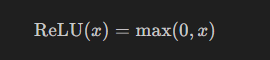

In [2]:
import torch
import torch.nn as nn 

relu_activation = nn.ReLU()
input_tensor = torch.randn(4)
output_tensor = relu_activation(input_tensor)

print(f"Input: {input_tensor}")
print(f"Output after ReLU: {output_tensor}")

Input: tensor([ 0.2275,  0.5938, -0.2248,  0.9974])
Output after ReLU: tensor([0.2275, 0.5938, 0.0000, 0.9974])


In [3]:
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(10, 20)
        self.activation = nn.ReLU()
        self.layer2 = nn.Linear(20, 5)

    def forward(self, x):
        x = self.layer1(x)
        x = self.activation(x) # Apply ReLU
        x = self.layer2(x)
        return x

model = SimpleNet()

`The ReLU function is zero for negative inputs and linear for positive inputs.`

#### Sigmoid

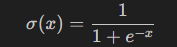

In [4]:
import torch
import torch.nn as nn

# Example usage
sigmoid_activation = nn.Sigmoid()
input_tensor = torch.randn(4) # Example input tensor
output_tensor = sigmoid_activation(input_tensor)

print(f"Input: {input_tensor}")
print(f"Output after Sigmoid: {output_tensor}")

Input: tensor([-0.6983,  1.3524,  0.6727, -1.1562])
Output after Sigmoid: tensor([0.3322, 0.7945, 0.6621, 0.2394])


`The Sigmoid function smoothly maps any real number to the range (0, 1).`

#### Tanh (Hyperbolic Tangent)
The hyperbolic tangent, or Tanh function, is mathematically related to Sigmoid but squashes its input into the range (-1, 1).

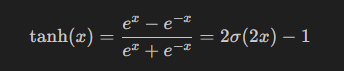

In [5]:
import torch
import torch.nn as nn

# Example usage
tanh_activation = nn.Tanh()
input_tensor = torch.randn(4) # Example input tensor
output_tensor = tanh_activation(input_tensor)

print(f"Input: {input_tensor}")
print(f"Output after Tanh: {output_tensor}")

Input: tensor([-0.3359, -0.8207,  0.9045, -0.8094])
Output after Tanh: tensor([-0.3238, -0.6755,  0.7185, -0.6693])


`The tanh function smoothly maps any real number to the range (-1, 1).`

## Sequential Containers for Simple Models

In [6]:
# simple two-layer feed-forward network
# 784-dimensional input, 128 units hidden layer, ReLU activation, 10-dimensional output

import torch
import torch.nn as nn
from collections import OrderedDict

# Define input, hidden, and output dimensions
input_size = 784
hidden_size = 128
output_size = 10

In [7]:
# Method 1: Passing modules directly as arguments
model_v1 = nn.Sequential(
    nn.Linear(input_size, hidden_size), # Layer 1: Linear transformation
    nn.ReLU(),                         # Activation 1: Non-linearity
    nn.Linear(hidden_size, output_size) # Layer 2: Linear transformation
)

# Print the model structure
print("Model V1 (Unnamed Layers):")
print(model_v1)

Model V1 (Unnamed Layers):
Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)


In [8]:
# Assume a batch size of 64
dummy_input = torch.randn(64, input_size)
output = model_v1(dummy_input)
print("\nOutput shape:", output.shape) 


Output shape: torch.Size([64, 10])


In [9]:
# Method 2: Using an OrderedDict for named layers
model_v2 = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_size)), # Fully connected layer 1
    ('relu1', nn.ReLU()),                      # ReLU activation
    ('fc2', nn.Linear(hidden_size, output_size)) # Fully connected layer 2
]))

# Print the model structure
print("\nModel V2 (Named Layers):")
print(model_v2)


Model V2 (Named Layers):
Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [10]:
# Accessing a specific layer by name is now possible
print("\nAccessing fc1 weights shape:", model_v2.fc1.weight.shape)
# You can also access using integer indices if needed
print("Accessing layer at index 0:", model_v2[0])
# Or by the string name directly if using OrderedDict
print("Accessing layer by name 'relu1':", model_v2.relu1)


Accessing fc1 weights shape: torch.Size([128, 784])
Accessing layer at index 0: Linear(in_features=784, out_features=128, bias=True)
Accessing layer by name 'relu1': ReLU()


## Loss Functions (`torch.nn` losses)

The core idea is simple: a loss function takes the model's output (predictions) and the ground truth (targets) as input, and computes a single scalar value representing the "error" or "loss". 

This scalar loss value is then used by PyTorch's Autograd system during backpropagation to calculate gradients, which in turn guide the optimizer (like SGD or Adam from torch.optim) on how to adjust the model's parameters (weights and biases) to minimize this loss.

`The loss function compares model predictions with target data to produce a scalar loss value, which guides parameter updates via backpropagation.`

### Regression Losses

#### Mean Squared Error (MSELoss)

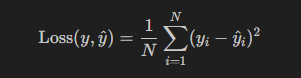

In [11]:
import torch
import torch.nn as nn

# Instantiate the loss function
loss_fn = nn.MSELoss()

# Example predictions and targets (batch size 3, 1 output feature)
predictions = torch.randn(3, 1, requires_grad=True)
targets = torch.randn(3, 1)

# Calculate the loss
loss = loss_fn(predictions, targets)
print(f"MSE Loss: {loss.item()}")

MSE Loss: 0.8289179801940918


#### Mean Absolute Error (L1Loss)

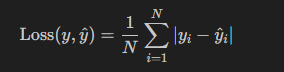

Compared to MSE, L1 loss is generally considered less sensitive to outliers because it doesn't square the errors.

In [12]:
import torch
import torch.nn as nn

loss_fn_l1 = nn.L1Loss()
predictions = torch.tensor([[1.0], [2.5], [0.0]], requires_grad=True)
targets = torch.tensor([[1.2], [2.2], [0.5]])

loss_l1 = loss_fn_l1(predictions, targets)
print(f"L1 Loss: {loss_l1.item()}")

L1 Loss: 0.3333333432674408


### Classification Losses

#### Cross-Entropy Loss (CrossEntropyLoss) `torch.nn.CrossEntropyLoss`

* Applying a `LogSoftmax`function to the model's raw output scores (logits). Softmax converts logits into probabilities that sum to 1, and LogSoftmax takes the logarithm of these probabilities.
* Calculating the Negative Log Likelihood Loss (`NLLLoss`) between the LogSoftmax outputs and the target class indices.

In [13]:
import torch
import torch.nn as nn

loss_fn_ce = nn.CrossEntropyLoss()

# Example: Batch of 3 samples, 5 classes
# Raw scores (logits) from the model
predictions_logits = torch.randn(3, 5, requires_grad=True)
# True class indices (must be LongTensor)
targets_classes = torch.tensor([1, 0, 4]) # Class indices for the 3 samples

loss_ce = loss_fn_ce(predictions_logits, targets_classes)
print(f"Cross-Entropy Loss: {loss_ce.item()}")

Cross-Entropy Loss: 1.553871512413025


#### Binary Cross-Entropy Loss (BCELoss and BCEWithLogitsLoss)

In [14]:
import torch
import torch.nn as nn

loss_fn_bce_logits = nn.BCEWithLogitsLoss()

# Example: Batch of 4 samples, 1 output node (binary classification)
predictions_logits_bin = torch.randn(4, 1, requires_grad=True) # Raw logits
# Targets should be floats (0.0 or 1.0)
targets_bin = torch.tensor([[1.0], [0.0], [0.0], [1.0]])

loss_bce = loss_fn_bce_logits(predictions_logits_bin, targets_bin)
print(f"BCE With Logits Loss: {loss_bce.item()}")

BCE With Logits Loss: 0.46984708309173584


## Building a Simple Network

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the network structure
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__() # Initialize the parent class
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Define the forward pass
        out = self.layer_1(x)
        out = self.relu(out)
        out = self.layer_2(out)
        # Note: We don't apply Sigmoid here if using BCEWithLogitsLoss later
        return out

# Define network parameters
input_features = 2
hidden_units = 10
output_classes = 1 # Single output for binary classification logit

# Instantiate the network
model = SimpleNet(input_features, hidden_units, output_classes)

# Print the model structure
print(model)

SimpleNet(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (relu): ReLU()
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)


In [16]:
# --- Data Preparation (Example Placeholder) ---
# Imagine we have some input data (X) and target labels (y)
# For this example, let's create dummy tensors
# A mini-batch of 5 samples, each with 2 features
dummy_input = torch.randn(5, input_features)
# Corresponding dummy labels (0 or 1) - need float for BCEWithLogitsLoss
dummy_labels = torch.randint(0, 2, (5, 1)).float()

# --- Instantiate Model, Loss, and Optimizer ---
# Model already instantiated above: model = SimpleNet(...)

# Loss function: Binary Cross Entropy with Logits
# This loss is suitable for binary classification and expects raw logits as input
criterion = nn.BCEWithLogitsLoss()

# Optimizer: Adam is a popular choice
# We pass the model's parameters to the optimizer
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

print(f"\nUsing loss: {criterion}")
print(f"Using optimizer: {optimizer}")


Using loss: BCEWithLogitsLoss()
Using optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


In [17]:
# --- Simulate a Single Training Step ---

# 1. Forward Pass: Get model predictions (logits)
outputs = model(dummy_input)
print(f"\nModel outputs (logits) shape: {outputs.shape}")
# print(f"Sample outputs: {outputs.detach().numpy().flatten()}") # Optional: view outputs

# 2. Calculate Loss
loss = criterion(outputs, dummy_labels)
print(f"Calculated loss: {loss.item():.4f}") # .item() gets the scalar value

# 3. Backward Pass: Compute gradients
# First, ensure gradients are zeroed from previous steps (important in a real loop)
optimizer.zero_grad()
loss.backward() # Calculate gradients of loss w.r.t. model parameters

# 4. Optimizer Step: Update model weights
optimizer.step() # Update parameters based on calculated gradients

# --- Inspect Parameters (Optional) ---
# You can inspect gradients after the backward pass (before optimizer.step())
print("\nGradients for layer_1 weights (sample):")
print(model.layer_1.weight.grad[0, :]) # Access gradient of a specific parameter

# Or inspect parameter values after the step
print("\nUpdated layer_1 weights (sample):")
print(model.layer_1.weight[0, :])


Model outputs (logits) shape: torch.Size([5, 1])
Calculated loss: 0.7202

Gradients for layer_1 weights (sample):
tensor([0., 0.])

Updated layer_1 weights (sample):
tensor([-0.5542, -0.6292], grad_fn=<SelectBackward0>)
